<img style="border-radius: 0.5rem;" src="banner.jpg" />
<a style="margin-top: 1rem;" class="btn btn-lg btn-block btn-success" href="https://dsg.ucfsigai.org/fa18/signin/">
    Sign in (https://dsg.ucfsigai.org/fa18/signin/)
</a>

# Solving the Computationally Impossible with Heuristics
---
by: Evan Waldmann \([@Waldmannly](github.com/Waldmannly/)\), on 10 Oct 2018

## Minimizing a function, the familar way

Optimization techniques usually rely on have a nice, continuous function that is capable of being minimized through derivative based techniques which you should be familar with if you have taken Calculus 1. 

So, say we wanted to minimize a simple function like $f(x) = x^4 + x^2 -4 x^2 + 10$. In order to find the minimum of the function, you find $\frac{d}{dx}(f(x))$  solve for $x$ and plug the answer back into $f(x)$. 

So $\frac{d}{dx}(f(x)) = 4x^3 + 2x - 8 x = x^2 (4x - 6)$. Then we have 

$x^2 =0$ and $4x-6 = 0$. So our $x$ is $0$ and $\pm \frac{3}{2}$. 

then we plug in $f(x)$ and get $(0,10)$, $(-3/2, 31/4)$, $(3/2, 31/4)$. So we technically have two global minima. That method of minimizing the function is exact. 


## When we don't know the answer, just guess 

But what do we do for real world problems that can not be boiled down to a nice differentible function? 

Well, we end up guessing, which works when we don't care if we have the exact solution (i.e. the absolute minimum). 

If the problem if simple enough, we usually just test all of the possible scenarios and take the best value as our answer. Since computes are super fast, this often works well because its easy. 

BUT when the problems are not simple, we have to make our computers make smarter guesses. 


## Traveling Salesman Problem (TSP)

Let's look at a classic problem called the Traveling Salesman Problem that has been around since the 1930's. Say that you have a list of cities and the distances between them, the TSP is about finding the shortest path that allows you to vist all of the cities. 

<img src="Illustration-of-the-Travelling-Salesman-Problem-Source.png" alt="Example of a real world TSP" />



If you were to brute force by randomly guessing then running time would end up being $O(n!)$, so for any number of cities over say $20$ it would be unrealistic. In fact even state of the art methods that use dynamic programming are only able to get down to $O(n^2 2^n)$. 


So what are some ideas that you have for making your computer guess a bit smarter. (Those of you done with CS1 or CS2 should have a few ideas). 

***
<br>
<br>
<br>
<br>
<br>

Well most of those answers can be boiled down to either <br>
> (1) **Exploration**  - looking around the solution space to gather more information<br>
> (2) **Exploitation** - making the best descision given the current information 
 
I am not going to dive too deep into the the theory here, because it does get dense and statistically hard very quickly. The idea is that we need to explore in order to make sure that we did not miss anything that could be hiding in the solution space, but we also need to exploit what we know so that we can get as close as we can to the right solution. The problem is that these two ideas are competing with each other; often if we are exploring we can not exploit and if we are exploiting we can not explore. The balance of these two ideas is pretty much what the field of heuristics is all about (and the "correct" method and parameter tuning often depends on the solution you are trying to solve).  
 
 
__So the key take away is that  heuristics is about smart guessing and by either exploring the solution space or exploiting what we know, we can help our computer guess a bit better.__

 

In [2]:
def dataset(path):
    import os
    from pathlib import Path
    datadir = Path(os.environ["DATA_DIR"])
    return Path(datadir.joinpath(path))


## Setting up code to optimize the TSP 

One of the most important things in heuristics is how you encode your problem into your code. 
It is important to recognize that depending on the problem almost every solution will be encoded differently, so you can think of these heuristic algorithms as a framework that you can shape to fit your problem. 

For the traveling salesman problem our solution will be a "tour" of cites. We will represent this as a vector of numbers $[2\: 4\: 3\: 1\: 6\: 5]$, where this vector will mean that our tour travels from 2 to 4 to 3 and so on. 

Since the problem is about finding the minmum distance to tour all of the cities, we need a **cost function**, which is also known as an objective function, that calculates the distance of the tour for a given vector. 

We also need to figure out how to guess solutions that should be close to some given solution; these new solutions that are created from a slight change of an existing solution are its **neighbor solutions**. This make our guessing a little less random. 

With that we can define the traveling salesman random neighboring solution generator and solution cost function below. 

In [3]:
import numpy as np 

# this function will calculated the total cost of tour that we throw to it
def tspobjective(a, d):
    ofv = 0
    for i in range(len(a)-1):
        ofv = ofv + d[a[i]][a[i+1]]
    ofv = ofv +  d[a[len(a)-1]][a[1]]  
    return ofv;

# a is a sample solution
a = [4 ,2 ,6 ,1 ,7 ,5 ,3]
# d is the distance matrix that holds the "distances" or weights between cities 
d = [[0,   6, 42, 29,  5, 13, 25, 44, 44,  8],
     [6 ,  0, 44, 44, 22, 37,  7, 19, 42, 36 ],
     [42 ,44,  0, 44, 30,  2, 39, 43, 31, 35 ], 
     [29, 44 ,44,  0 ,34, 18 ,30,  8, 32,  2 ],
     [ 5, 22 ,30, 34 , 0 ,13 , 3 , 5, 38, 32 ], 
     [13, 37  ,2, 18 ,13 , 0 ,15 ,43,  2, 20 ],
     [25,  7 ,39, 30 , 3 ,15 , 0 ,18, 35, 36 ],
     [44, 19 ,43,  8  ,5 ,43 ,18 , 0,  9, 23 ],
     [44, 42 ,31, 32 ,38 , 2 ,35 , 9,  0, 21 ], 
     [8, 36, 35 , 2, 32 ,20, 36 ,23, 21,  0 ]]
print("Example 1")
print(a)
print(tspobjective(a,d))

# we can generate a random tour with using numpy
randomperm = np.random.permutation(7)
print("\n\nExample 2")
print(randomperm)
print(tspobjective(randomperm,d))


Example 1
[4, 2, 6, 1, 7, 5, 3]
200


Example 2
[2 6 4 1 0 5 3]
131


## Brute force 

We could brute force the TSP with the code below (or a slight modification to it), but as I mentioned with anthing beyond 20 cities will take an extremely long time. But the brute force method is good to look at because you can see the differences that heuristics will add to attempt to get a better answer. 

In [4]:
a = np.random.permutation(7)
ofv = tspobjective(a,d)
bestofv = ofv
bestTour = a 

for j in range(10):
    a = np.random.permutation(7)
    ofv = tspobjective(a,d)
    if (ofv < bestofv):
        bestofv = ofv 
        bestTour = a 
    
print(bestofv)
print(bestTour)

127
[6 4 1 0 2 5 3]


## Generating Neighbor Solutions

In order use heuristics, we often have to find a way to generate solutions from existing solutions. Ideally the new solution you get only changes the previous solution by a small amount-- this will help us when we try to **exploit** what we know from our best found solution. This is a key idea in almost all heuristics, so please ask if you do not completely understand that concept. 

In [5]:
import random 

# this function swaps the order of two numbers from a given input solution
def tspswap(a):
    l = random.randint(0,len(a)-1)
    m = random.randint(0,len(a)-1)
    while l==m:
        m = random.randint(0,len(a)-1)
    temp = a[l]
    a[l] = a[m]
    a[m] = temp
    newa = a
    return(newa); 

a = [4 ,2 ,6 ,1 ,7 ,5 ,3]
print(a)
print(tspswap(a))
print(tspswap(a))

[4, 2, 6, 1, 7, 5, 3]
[4, 7, 6, 1, 2, 5, 3]
[4, 7, 1, 6, 2, 5, 3]


In [6]:
# this is an example of the brute force solution but only generating random solution from our inital tour. 
# Using this method it is capable of getting stuck in a local minimum because of the exploitation principle 

a = np.random.permutation(7)
bestofv = tspobjective(a,d)
best=a[:]

for i in range(1,10):  
    #generate neighbor sols
    na= tspswap(a)
    naofv = tspobjective(na,d)
    if (naofv<bestofv):
        best = na[:]
        bestofv = naofv
    a = na[:] #create neighbors from the neighbor to get variety 
    
Best = best 
BestOFV = bestofv 

print(Best)
print(bestofv)

[4 0 1 3 2 6 5]
123


## Simulated Annealing (SA) 

Heuristics are usually based off of processes in nature and the first algorithm I am going to cover is called Simulated Annealing.

The idea for simulated Annealing came from the process of hardening metal. In order to harden metal you heat it up and let it cool -- its called annealing.

<img src="Simulated-Annealing-optimization-of-a-one-dimensional-objective-function.png" alt="Exploring the Solution Space with Simulated Annealing" width=400px>



### So how exactly does that relate to smart guessing? 

Well when you heat up the metal to when it is glowing read, the particles in the metal are bouncing around a lot, and as the metal slowly cools, the particles start to move less and less. This gives us a frame work for how to guide our exploration versus exploitation. When the metal is super hot, we are going to explore the solution space more, and as we cool, we are going settle in on specific spots in the space that have produced good results. 

We can relate this to code, by thinking of the particles bouncing around as trying to "jump" out of local minimum, otherwise know as **exploring** the solution space. This is done by accepting some sub optimal solutions based on comparing a random number with a probablity distribution. This distribution depends on the current temperature, so as the algorithm progress we have less of a probability to accept "bad" solutions, which when paired with the nieghbor solution generator is how SA **exploits** its knowledge. 



<img src="The-pseudo-code-of-simulated-annealing-algorithm.png" alt="Pseudocode of Simulated Annealing" width=400px>

In [7]:
import random 
import math 

def SA(a,d, T,tf, N, K, alpha):
    currenta = a[:]
    besta = a[:]
    bestofv = tspobjective(a,d)
    ofvNew = bestofv
    ofvOld = bestofv
    na =currenta[:]
    #initalize counting variables 
    n=1
    k=1
    kk=0
    iteration =-1
    x= [None for x in range(100)]
    #outer loop
    while tf<T:
        iteration = iteration +1
        #reset counting variables
        n=1
        k=1
        #inner loop
        while n<= N and k<=K:
            #generate neighbor solution 
            na= tspswap(currenta[:])[:]
            kk = kk+1 #summation of total number of solution generated 
            #store values so you only have to compute them once
            ofvNew = tspobjective(na, d)
            ofvOld = tspobjective(currenta,d)
            if (ofvNew < ofvOld): #check to see if neighbor solution is better 
                currenta = na[:]
                n=n+1
                k=k+1
                if ofvNew < bestofv: #check if neighbor solution is best 
                    bestofv = ofvNew
                    besta = currenta[:]
            elif random.uniform(0, 1) < math.exp(-(ofvNew -ofvOld)/T):#check to accept bad solution
                k=k+1
                n=n+1
                currenta= na[:]
            else:
                n=n+1
        T= alpha*T #decrease Temperature 
        x[iteration] = bestofv
    return(besta, bestofv, kk,iteration,x); 
    
N=20
K=5 #stopping condition for inside loop
T=10000
tf =4 #stopping condition for outer loop 
alpha = .9 #rate of cooling 
a = [1,2,3,4,5,6]

answer= SA(a, d, T, tf, N,K,alpha)
print(answer)


([2, 5, 4, 6, 1, 3], 87, 597, 74, [119, 119, 119, 119, 119, 119, 103, 103, 103, 103, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None])


In [8]:
from matplotlib import pyplot as plt 
y= answer[4]

plot = plt.plot(range(0,len(y)),y)
plt.xlabel("Iterations")
plt.ylabel("Global Value")
plt.show()

<Figure size 640x480 with 1 Axes>

## Particle Swarm Optimization (PSO) 

Particle Swarm Optimization is based of animals that swarm, think bees, birds, or even ants. By having a chances of generating neighbor solutions with our particles personal best and all of the particles' global best, we can **exploit** what we have learned in the algorithm. On the other hand, by generating  he particles current position, we can **explore** the solution space. This allows us to send particles around the solution space, so that when one eventually gets stuck in a local mimimum, we have others to fall back on. 

<img src="psoexample.png" alt="Pseudocode of Particle Swarm Algorithm" />

The code is pretty simple. The strangest part involves picking a particles new solution from a chance box, which when coded for the TSP looks a little abstract. When applied to a cartesian system, people often code in a velocity that has a magnitude and direction that can be altered randomly depending on the global and particle's best. Then the velocity is added to the particles current position to explore the solution space. If this is a bit confusing that's fine an animation such as what is found here can be extremely helpful (https://www.youtube.com/watch?v=_bzRHqmpwvo). 

<img src="The-PSO-Algorithm-Pseudo-Code.png" alt="Pseudocode of Particle Swarm Algorithm" />

In [9]:
#Set algorithm parameters (Num_particles, Max_time _step, w, c 1 , c 2 ).tstep=1.
import math 
num_particles= 4
max_time_step = 60
w = 2 # number of chances to have a neighbor solution to the particles current solution
c1 = 2# number of chances to have a neighbor solution to the particles best solution
c2 = 1 # number of chances to have a neighbor solution to the global best solution 
tstep = 1
numcites =7

allglobalofvs = [None for x in range(100)] 
tstep =0

#Generate initial particles.
particles = [np.random.permutation(numcites) for particles in range(num_particles)]
ofvs = [-1 for ofvs in range(num_particles)]
for i in range(0,num_particles):
    ofvs[i] = tspobjective(particles[i],d)


print(particles)
print(ofvs)

#set up variables for tracking particle and global bests 
globalbestofv = min(ofvs)
globalbest = particles[ofvs.index(min(ofvs))]
print(globalbest)
print(globalbestofv)
particlesbest = particles[:]
particlesbestofv = ofvs[:]

# run the PSO algorithm 
while tstep<= max_time_step:
    allglobalofvs[tstep] = globalbestofv
    #• For each particle
    for p in range(0,num_particles-1):
        #• Construct a chance box
        x = [-1 for x in range(numcites)]
        chanceBox = [ x for chanceBox in range(w+c1+c2)]
        #• Generate w neighbour solutions from selected particle and put them in the chance box.
        for i in range(0,w): 
            chanceBox[i] = tspswap(particles[p])
        #• Generate c 1 neighbour solutions from corresponding particle’s pbest and put them in the chance box.
        for i in range(w,w+c1): 
            chanceBox[i] = tspswap(particlesbest[p])
        # Generate c 2 neighbour solutions from the gbest and put them in the chance box.
        for i in range(w+c1, w+c1+c2):
            chanceBox[i] = tspswap(globalbest)
        # Select a solution from the chance box randomly
        particles[p] = chanceBox[random.randint(0,w+c1+c2-1)]#• Consider the selected solution as the new position of the selected particle
        #• Calculate the objective function value of all particles
        ofvs[p] = tspobjective(particles[p] ,d)
        #update pbest if needed
        if (ofvs[p] < particlesbestofv[p]):
            particlesbestofv[p] = ofvs[p]
            particlesbest[p] = particles[p] 
    #update gbest if needed 
    globalbestofvTemp = min(ofvs)
    if (globalbestofvTemp < globalbestofv):
        globalbest = particles[ofvs.index(min(ofvs))]
        globalbestofv = globalbestofvTemp
    tstep =tstep+1

[array([3, 0, 1, 6, 5, 4, 2]), array([3, 6, 4, 5, 2, 0, 1]), array([4, 3, 5, 6, 2, 1, 0]), array([6, 5, 3, 4, 2, 0, 1])]
[142, 103, 185, 182]
[3 6 4 5 2 0 1]
103


In [10]:
print(globalbest)
print(globalbestofv)


[1 2 6 5 3 4 0]
90


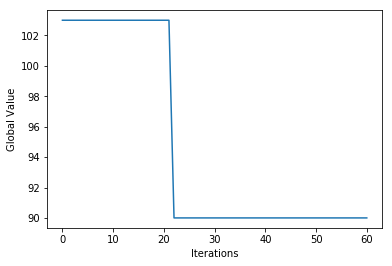

In [11]:
from matplotlib import pyplot as plt 


plot = plt.plot(range(0,len(allglobalofvs)) , allglobalofvs)
plt.xlabel("Iterations")
plt.ylabel("Global Value")
plt.show()

## Wrap up

So, it might make more sense now that we have finished the lecture to talk about the general performance. Unfortunately with heuristics talking about preformance is really annoying because it depends on the input parameters. One thing that is pretty neat is that you can check the difference between the "best" solution generated from the brute force code the neighbor solutions brute force code. Why should one always be lower than the other? Additionally, you can play with the parameters to find "optimal" parameters, research will usually refer to this as hyper parameter tunning. 

<br>

I hope you learned somthing today. Hopefully you now know a little bit more about the key points from the lecture 
- Traveling Saleman Problem
- Neighbor solutions 
- Exploitation
- Exploration
- Simulated Annealing 
- Particle Swarm Optimization

<br> 
<br> 
If you want to know more, you can check out these links 
- https://am207.github.io/2017/wiki/lab4.html 
    - this is a full turtorial that covers simulated annealing in multiple contexts from harvard. 
- https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/
    - this is an example of particle swarm coded on a cartesian plane.  

<br>

If you liked this material, you might also like 
- Genetic Algorithm (https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_quick_guide.htm)
- Tabu Search (http://www.dei.unipd.it/~fisch/ricop/tabu_search_tutorial.pdf or http://www.cleveralgorithms.com/nature-inspired/stochastic/tabu_search.html) 
